   # Module 6 : Monte-Carlo methods

##  Librairies 

Nous allons regrouper ci-dessous toute les librairies que nous utiliserons pour répondre aux questions du Module 6 : Monte-Carlo methods. Nous spécifierons évidemment quand nous appelerons différentes fonctions venant des différentes librairies 

In [287]:
#Partie numérique
import numpy
from numpy import random
import timeit

#Partie graphique 
from colour import Color
from matplotlib import animation            
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import rcParams
from IPython.display import HTML
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

## Notebook 2

### Challenge 1.

Prenons quelques exemples de processus aléatoires fournis par `numpy` et la fonction `random`. 
Nous avons dans l'ordre, 

**Distribution exponentielle** : 
$$
p(x)=
\begin{cases} 
\lambda e^{-\lambda x} &\mbox{for } x\geq 0 \\
0 &\mbox{if } x<0
\end{cases} 
$$
où $\lambda$ est un paramètre, $\lambda > 0$

**Distribution Gausienne** :
$$p(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac
{(x-\mu)^2}{2\sigma^2}}$$
où $\mu$ est la moyenne et $\sigma$ l'écart type

**Distribution uniforme** : 
$$p(x) = \frac{1}{b-a}~~~~x\in[a,b] $$

**Distribution de Cauchy** :
$$p(x;x_0,a)=\frac{1}{\pi}\left[\frac{a}{(x-x_0)^2+a^2}\right]$$

**Loi Student** : 
$$f_T(t)= \frac{1}{k\pi}\frac{\Gamma\left(\frac{k+1}{2}\right)}{\Gamma\left(\frac{k}{2}\right)}\left(1+\frac{t^2}{k}\right)^{-\frac{k+1}{2}}$$

avec $\Gamma$ la focntion Gamma d'Euler, $k$ le nombre de degrés de liberté, $k>0$.

**Loi binomiale** :
$$ P(X = k) = {n\choose k} p^k(1-p)^{n-k} $$

avec $p\in [0,1]$

Text(0.5, 1.0, 'Loi binomiale')

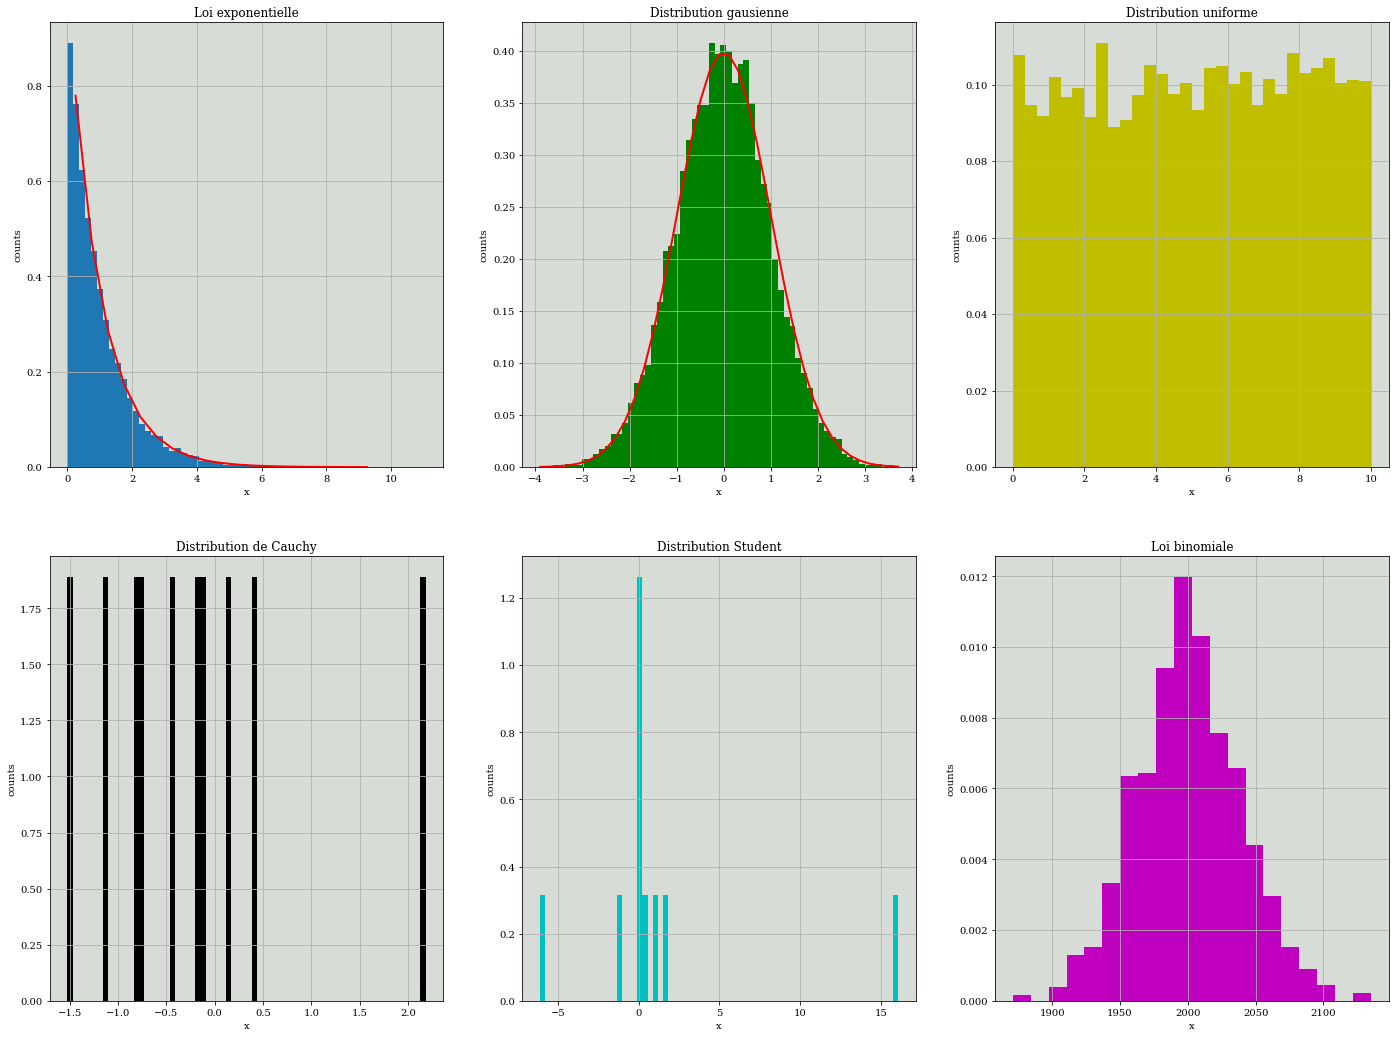

In [46]:
#Paramètres

lambdaa = 1

mu = 0

sigma = 1

a, b = 0, 10

def gauss(mu,sigma,x):                                                        #Loi de Gauss
    return 1/numpy.sqrt(2*numpy.pi*sigma**2)*numpy.exp(-1/2*((x-mu)/sigma)**2)

def exp(lambdaa,x):                                                           #Loi exponentielle
    return lambdaa*numpy.exp(-lambdaa*x)

#Lois continues
 

values_expo=random.exponential(1/lambdaa,10000)  #(lambda, nombre d'expériences)

values_gauss=random.normal(mu,sigma,10000)    #(mu, sigma, nombre d'expériences)

values_rand=random.uniform(a,b,10000)   #(a, b, nombre d'expériences)

values_cauchy=random.standard_cauchy(10) #(nombre d'expériences)

values_student=random.standard_t(1.5,10) #(degrés de liberté, nombre d'expériences)

#Loi discrète

values_bin=random.binomial(10000,0.2,1000) #(nombre d'expérience, p, n)


#Partie graphique

fig_random_number_generators, axes=plt.subplots(2,3,figsize=(24,18))

#Loi exponentielle

binwidth_exp = 0.5
bins_exp = numpy.arange(0.0,10.0,binwidth_exp)
axes[0][0].grid()
axes[0][0].hist(values_expo,bins=60,density=True)
axes[0][0].set_xlabel("x")
axes[0][0].set_ylabel("counts")
axes[0][0].set_facecolor('xkcd:light grey')
axes[0][0].set_title('Loi exponentielle')

x_center_bin_exp = bins_exp[:-1] + binwidth_exp/2 
axes[0][0].plot(x_center_bin_exp, exp(lambdaa,x_center_bin_exp),'r',lw=2)      #Courbe théorique

#Loi gaussienne 

binwidth_gauss = 0.2
bins_gauss = numpy.arange(-4.0,4.0,binwidth_gauss)
axes[0][1].grid()
axes[0][1].hist(values_gauss,bins=60,density=True,color='g')
axes[0][1].set_xlabel("x")
axes[0][1].set_ylabel("counts")
axes[0][1].set_facecolor('xkcd:light grey')
axes[0][1].set_title('Distribution gausienne')

x_center_bin_gauss = bins_gauss[:-1] + binwidth_gauss/2 
axes[0][1].plot(x_center_bin_gauss, gauss(mu,sigma,x_center_bin_gauss),'r',lw=2)   #Courbe théoriquee

#Loi uniforme 

axes[0][2].grid()
axes[0][2].hist(values_rand,bins=30,density=True,color='y')
axes[0][2].set_xlabel("x")
axes[0][2].set_ylabel("counts")
axes[0][2].set_facecolor('xkcd:light grey')
axes[0][2].set_title('Distribution uniforme')

#Loi de Cauchy

axes[1][0].grid()
axes[1][0].hist(values_cauchy,bins=70,density=True,color='k')
axes[1][0].set_xlabel("x")
axes[1][0].set_ylabel("counts")
axes[1][0].set_facecolor('xkcd:light grey')
axes[1][0].set_title('Distribution de Cauchy')

#Loi Student

axes[1][1].grid()
axes[1][1].hist(values_student,bins=70,density=True,color='c')
axes[1][1].set_xlabel("x")
axes[1][1].set_ylabel("counts")
axes[1][1].set_facecolor('xkcd:light grey')
axes[1][1].set_title('Distribution Student')

#Binomiale

axes[1][2].grid()
axes[1][2].hist(values_bin,bins=20,density=True,color='m')
axes[1][2].set_xlabel("x")
axes[1][2].set_ylabel("counts")
axes[1][2].set_facecolor('xkcd:light grey')
axes[1][2].set_title('Loi binomiale')

### Comparaison entre les générateurs de Numpy et ceux du Notebook 2

Dans le Notebook 2 : Random Numbers, nous avons vu deux méthodes pour générer des distributions (en l'occurence exponentielle et gaussienne). La première, *Invertible distribution* utilise la fonction cumulatrice d'une loi de probabilité (et surtout son inverse)

$$ P\left(X<x\right) = F(x)$$

et des nombres distribués uniforméments, avec `numpy.random.random_sample` sur lequel on applique $F^{-1}$

Reprenons le code du Notebook 2 et comparons le avec notre générateur `random.exponential`

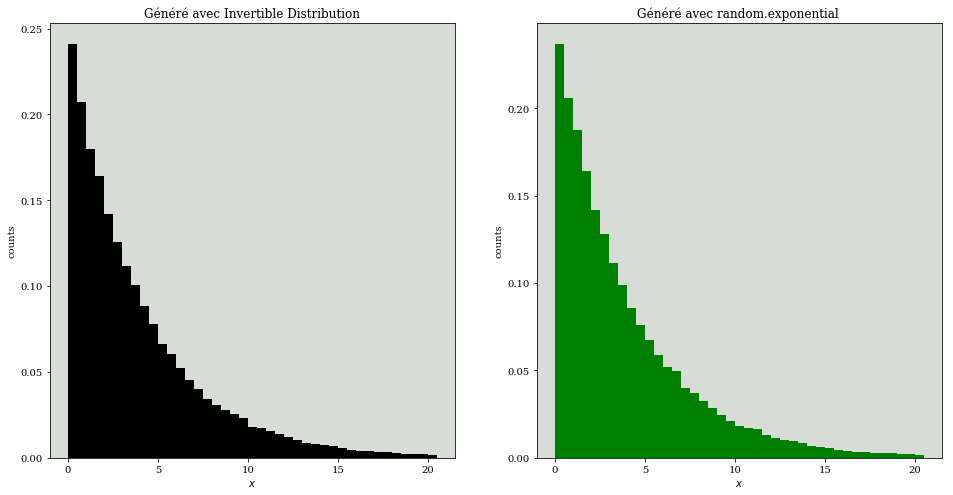

In [70]:
#Code du Notebook 

alpha = 0.25 # rate of the exponential distribution
x = numpy.random.random_sample(100000)
y_notebook = -1/alpha*numpy.log(1-x)

# Plots
binwidth=0.5
bins=numpy.arange(0.,21., binwidth)

#Code pour générer une distribution exponentielle avec numpy

y_numpy = random.exponential(1/alpha,100000)


#Graphiques

fig, ax = plt.subplots(1,2,figsize=(16,8))

ax[0].hist(y_notebook,bins,density=True,color='k')
ax[0].set_facecolor('xkcd:light grey')
ax[0].set_title('Généré avec Invertible Distribution')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel('counts')

ax[1].set_facecolor('xkcd:light grey')
ax[1].hist(y_numpy,bins,density=True,color='g')
ax[1].set_title('Généré avec random.exponential ')
ax[1].set_xlabel(r'$x$')
ax[1].set_ylabel('counts')

plt.show()


De toute évidence, l'algorithme présenté par le Notebook 2 est plus que satisfaisant, car qualitativement les deux graphiques sont les mêmes. Et cela reste viable pour des $N$ (nombres d'expériences) qui diffère de $100.000$.

Notons que nous ne pouvons tester cette méthode pour la loi normale, étant donné qu'il n'existe pas de forme analytique pour la fonction de répartition.

La deuxième méthode, *Von Neumann rejection Methods*, s'appuie sur une extraction intelligente de données $x_1$ distribuée selon $p_1(x)$ pour en tirer des données $x_2$ distribuées selon $p_2(x)$, la distribution voulue.


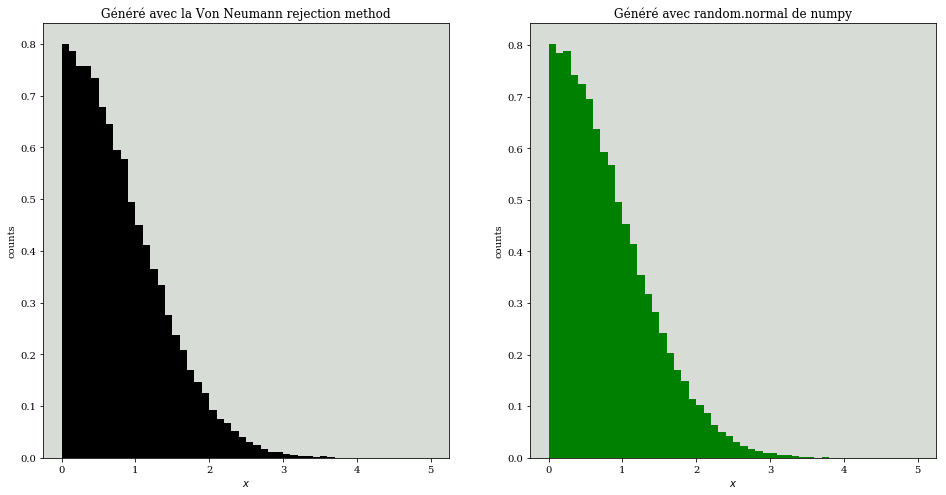

In [84]:
#Code du Notebook 2 

# Number of random numbers to draw according to p1 
N = 100000
K = 1.4

# Empty list for the final set of numbers
h_notebook=[]

for i in range(N):
    u1 = numpy.random.random_sample()
    
    # Distribute g according to the exponential distribution
    g = numpy.log(1/(1-u1))
    
    # Generate a second number for the acceptance/rejection condition
    u2 = numpy.random.random_sample()
    
    # Acceptance/rejection step
    ratio = 2*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi) / \
                (K*numpy.exp(-g))
    if (u2<ratio):
        # Append g to the set h
        h_notebook.append(g)


# Plots
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)


#Code avec le random.normal

x_numpy = random.normal(0,1,N)

#Graphiques

fig, ax = plt.subplots(1,2,figsize=(16,8))

ax[0].hist(h_notebook,bins,density=True,color='k')
ax[0].set_title('Généré avec la Von Neumann rejection method')
ax[0].set_facecolor('xkcd:light grey')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel('counts')


ax[1].hist(x_numpy,bins,density=True,color='g')
ax[1].set_title('Généré avec random.normal de numpy')
ax[1].set_facecolor('xkcd:light grey')
ax[1].set_xlabel(r'$x$')
ax[1].set_ylabel('counts')


plt.show()


On en tire les mêmes conclusion que pour l'exponentielle

### Challenge 2. 

La méthode de Box-Muller consiste à prendre deux variables $U_1$ et $U_2$ indépendantes et distribuées uniformément sur l'interval $]0,1]$

On définit ensuite 
$$Z_0 = R\cos\left(\Theta\right) = \sqrt{-2\ln U_1}\cos\left(2\pi U_2\right) $$
et 
$$Z_1 = R\sin\left(\Theta\right) = \sqrt{-2\ln U_1}\sin\left(2\pi U_2\right) $$

Alors nous avons que les deux variables $Z_0$ et $Z_1$ sont des variables aléatoires indépendantes suivant une loi normale centrée réduite  ($\mu=0$, $\sigma = 1$).

Testons cela et faisons la comparaison avec le générateur de numpy `random.normal` pour une centrée réduite

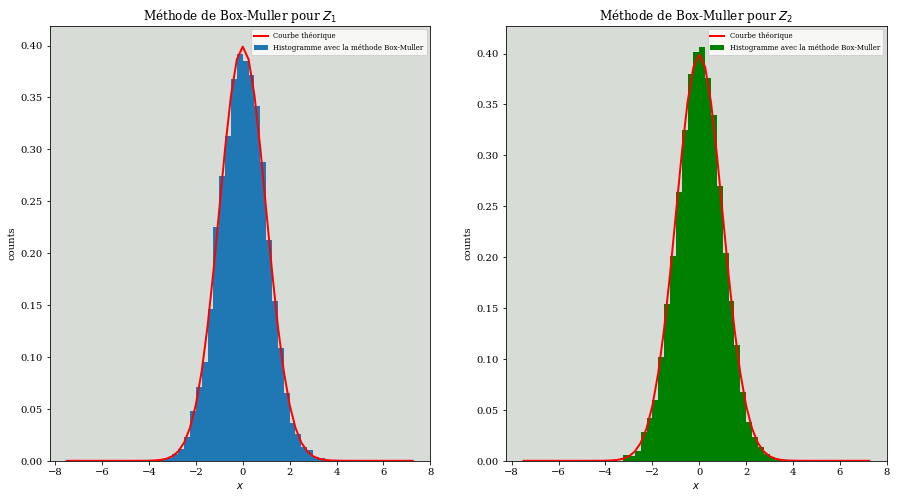

In [4]:
nb_experiences = 10000
mu = 0
sigma = 1

#On définit une fonction qui renvoie la fonction de Gauss évaluée en x
def gauss(x, mu, sigma):
    return 1 / numpy.sqrt(2*numpy.pi)/sigma * numpy.exp(-0.5*(x - mu)**2/sigma**2)

#U1 et U2 sont distribuées uniformément (1000)

U1 = random.uniform(0,1,nb_experiences)
U2 = random.uniform(0,1,nb_experiences)

#On définit ensuite Z1 et Z2 

Z1 = numpy.sqrt(-2*numpy.log(U1))*numpy.cos(2*numpy.pi*U2)
Z2 = numpy.sqrt(-2*numpy.log(U1))*numpy.sin(2*numpy.pi*U2)


#Voyons si les données sont cohérentes

binwidth = 0.25
bins = numpy.arange(-7.5,7.5,binwidth)


fig_box_muller, axes = plt.subplots(1,2,figsize=(15,8))

axes[0].set_title('Méthode de Box-Muller pour ' + r'$Z_1$')
axes[0].set_xlabel(r'$x$')
axes[0].set_ylabel('counts')
axes[0].hist(Z1,bins,density=True,label='Histogramme avec la méthode Box-Muller')    #Histogramme avce la méthode Box_muller
axes[0].plot(bins, gauss(bins, mu, sigma), 'r',label='Courbe théorique',lw=2)        #Loi normale centrée réduite
axes[0].legend(fontsize=7,loc=1)
axes[0].set_facecolor('xkcd:light grey')

axes[1].set_title('Méthode de Box-Muller pour ' + r'$Z_2$')
axes[1].set_xlabel(r'$x$')
axes[1].set_ylabel('counts')
axes[1].hist(Z2,bins,density=True,color='g',label='Histogramme avec la méthode Box-Muller')     #Histogramme avec la méthode Box-Muller
axes[1].plot(bins, gauss(bins, mu, sigma), 'r',label='Courbe théorique',lw=2)         #Loi normale centrée réduite
axes[1].legend(fontsize=7,loc=1)
axes[1].set_facecolor('xkcd:light grey')


Clairement, non peut voir que les données sont cohérentes et que $Z_1$ et $Z_2$ sont des variables indépendantes suivant la loi normale centrée réduite 

## Notebook 3

### Challenge 1

Nous avons donc l'équation de diffusion 
$$ \frac{\partial\rho}{\partial t} = \alpha \frac{\partial^2\rho}{\partial x^2}$$
Dont la solution, avec la condition initiale 
$$\rho(x,0) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{\left(x-\mu\right)^2}{2\sigma^2}} $$
est donnée par 
$$\rho(x,t) = \frac{1}{\sqrt{2\pi\sigma_t^2}}e^{-\frac{\left(x-\mu\right)^2}{2\sigma_t^2}} $$
où $\sigma_t^2=2\alpha t +\sigma^2$

Donc $\sigma^2_t$ évolue de manière linéaire avec $t$ 


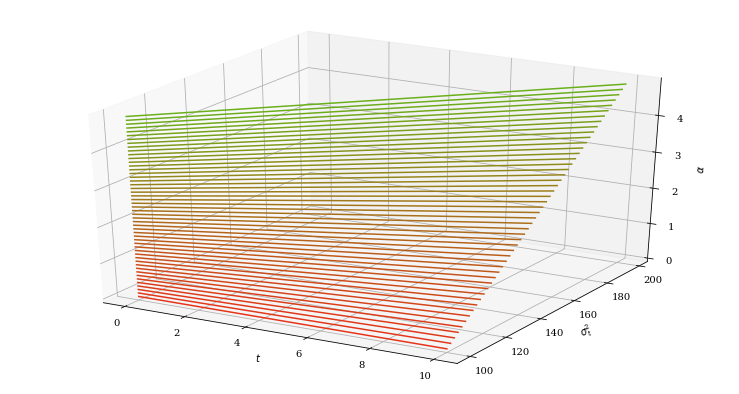

In [5]:
#Données 
t = 10 
sigma_2 = 100


#On plot le graphique de sigma_t_2 en fonction de alpha et t

t_grid = numpy.linspace(0,10,100)
alpha = numpy.arange(0,10,0.1)

fig_alpha = plt.figure(figsize=(13,7))
ax = fig_alpha.gca(projection='3d')

ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$\sigma_t^2$')
ax.set_zlabel(r'$\alpha$')



for k in range(50):
    sigma_t=sigma_2 + 2*alpha[k]*t_grid
    plt.plot(t_grid,sigma_t ,alpha[k],color=(0.9-k/100,0.2+k/100,0.1))


plt.show()
plt.close()
    

Nous voyons sur ce graphique que plus $\alpha$ augmente, plus $\sigma_t^2$ sera grand et donc la diffusion sera grande.

Prenons maintenant une contribution systématique au déplacement $dx$,

$$dx = cdt + \sqrt{2\alpha dt}\mathcal{N}(0,1) $$

Avec $c$ une constante. Analysons comment se passe le déplacement 

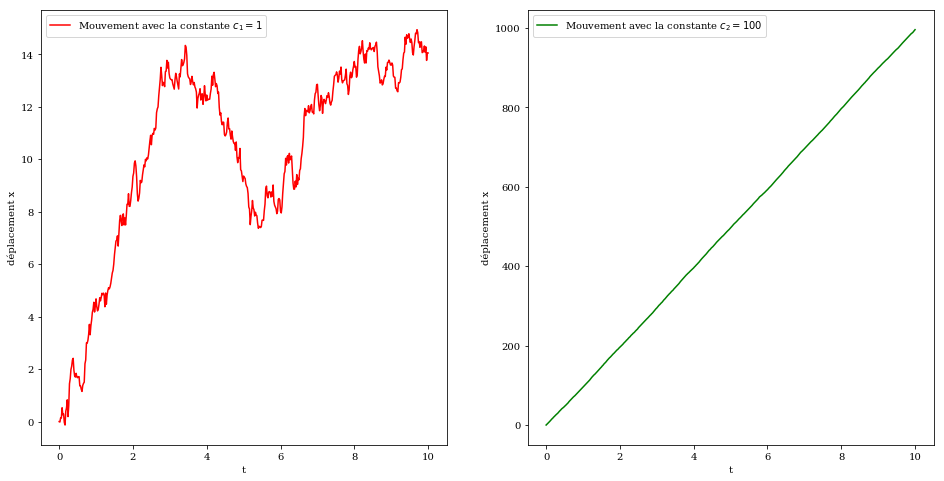

In [6]:
#On reprend le code du Notebook 3 et on va le modifier légèrement 

# Total simulation time
T=10.0

#Constant in the random walk (on va comparer le déplacement pour deux valeurs différentes)
c1 = 1
c2 = 100

# Number of time steps and time interval dt
nt=500
dt=T/nt

# Diffusion coefficient
alpha=2.0

# Particle positions and initial condition
t = numpy.arange(0,T+dt,dt)

x1= numpy.empty(nt+1)
x1[0]=0

x2= numpy.empty(nt+1)
x2[0]=0

# Time integration (note the use of the numpy.random.normal function)
for i in range(nt):
    x1[i+1]=x1[i]+ c1*dt +numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1)
    x2[i+1]=x2[i]+ c2*dt +numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1)

fig_c1_c2, ax = plt.subplots(1,2,figsize=(16,8))

ax[0].plot(t,x1,'r',label='Mouvement avec la constante ' + r'$c_1=1$')
ax[0].set_xlabel('t')
ax[0].set_ylabel('déplacement x')
ax[0].legend()

ax[1].plot(t,x2,'g',label='Mouvement avec la constante ' + r'$c_2=100$')
ax[1].set_xlabel('t')
ax[1].set_ylabel('déplacement x')
ax[1].legend()



Nous voyons que la constante $c$ modifie très peu le mouvement brownien lorsque $c=1$, ce qui n'est pas du tout le cas pour $c=100$ où là nous avons que $cdt \gg \sqrt{2\alpha dt}$ et donc on ne voit presque *plus de pas aléatoire*

Tout dépend du choix du *coefficient de diffusion* $\alpha$ et du choix de la constante $c$ 

Ici on montre l'évolution du déplacement en fonction de $t$ et de $c$

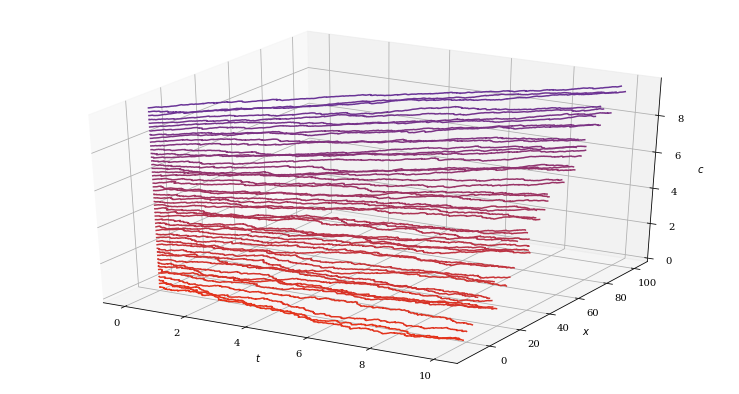

In [7]:
c = numpy.arange(0,10,0.2)                    #On prend des valeur de c allant de 0 à 10 

fig_constant = plt.figure(figsize=(13,7))      #On plot le graphique 3D
ax = fig_constant.gca(projection='3d')

ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$x$')
ax.set_zlabel(r'$c$')


for k in range(c.size):
    x = numpy.empty(nt+1)
    x[0]=0
    for i in range(nt):
        x[i+1]=x[i]+ c[k]*dt +numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1)
    plt.plot(t,x,c[k],color=(0.9-k/(2*c.size),0.2,0.1+k/(2*c.size)))


plt.show()
plt.close()
    

La solution analytique de ce problème est 

$$\rho(x,t) = \frac{1}{\sqrt{2\pi\sigma_t^2}}e^{-\frac{(x-\mu_t)^2}{2\sigma_t^2}} $$

avec $\mu_t = ct+\mu_0$ et $\sigma_t^2=2\alpha t + \sigma_0^2$

### Challenge 3

Regardons maintenant comment évolue le déplacement avec un pas 

$$dx = -\gamma x dt + \sqrt{2\alpha dt}\mathcal{N}(0,1) $$

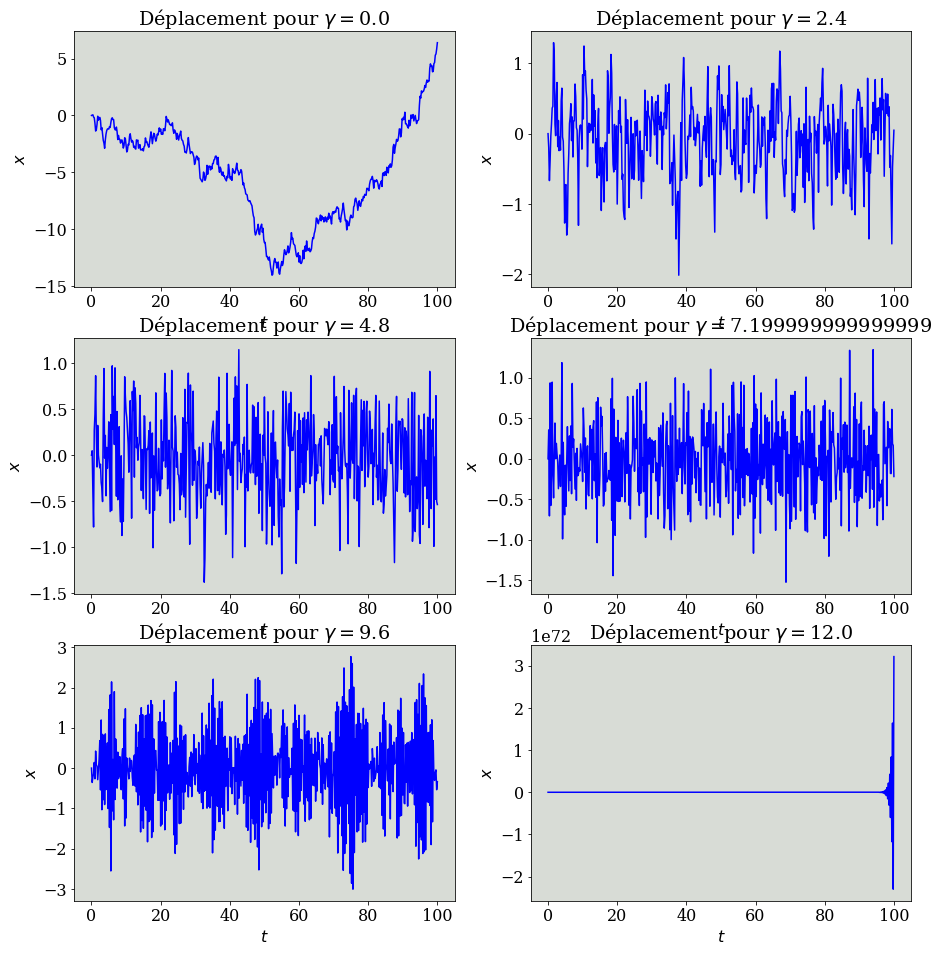

In [530]:
#Temps
T = 100

# Nombre de step et constantes
nt = 500
dt = T/nt
c = 0.1
gamma = numpy.linspace(0.0,12.0,6)
alpha = 0.5



t = numpy.arange(0,T+dt,dt)
x = numpy.empty([6,nt+1])

for m in range(gamma.size):             #Position à l'origine nul

    x[m][0] = 0


for i in range(nt):                   #On implémente le pas
    
    x[0][i+1] = x[0][i] - gamma[0]*x[0][i]*dt + numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1)
    x[1][i+1] = x[1][i] - gamma[1]*x[1][i]*dt + numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1)
    x[2][i+1] = x[2][i] - gamma[2]*x[2][i]*dt + numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1)
    x[3][i+1] = x[3][i] - gamma[3]*x[3][i]*dt + numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1)
    x[4][i+1] = x[4][i] - gamma[4]*x[4][i]*dt + numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1)
    x[5][i+1] = x[5][i] - gamma[5]*x[5][i]*dt + numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1)


fig, ax = plt.subplots(3,2,figsize=(15,16))

for k in range(3):
    for l in range(2):
        p=0
        p+=1
        ax[k][l].plot(t,x[l+k*2],'b')
        ax[k][l].set_title('Déplacement pour ' + r'$\gamma = $' + str(gamma[k*2+l]))
        ax[k][l].set_facecolor('xkcd:light grey')
        ax[k][l].set_xlabel(r'$t$')
        ax[k][l].set_ylabel(r'$x$')
        
plt.show()

Nous voyons qu'à partir d'un certain $\gamma$, la solution explose et on observe plus le mouvement erratique.

Regardons pour $\gamma = 0.5$ comment se comporte la solution lorsque $T\rightarrow\infty$

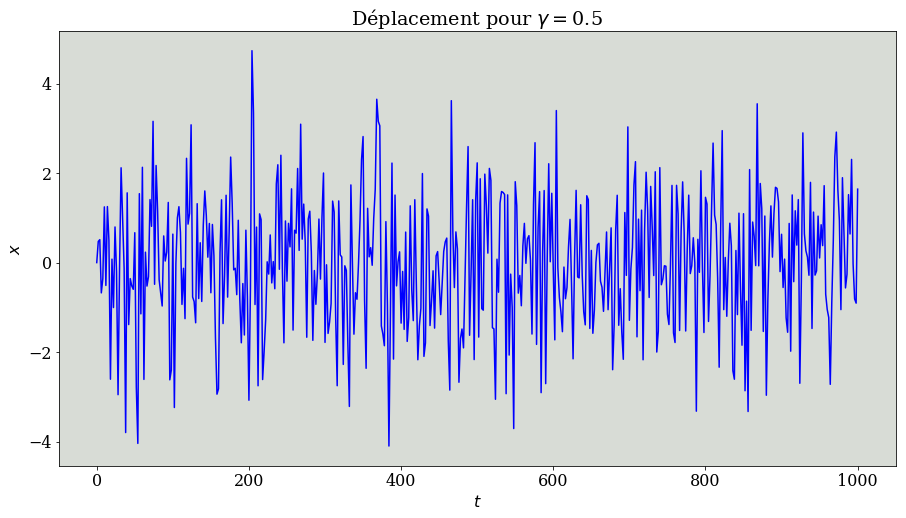

In [526]:
#Temps
T = 1000

# Nombre de step et constantes
nt = 500
dt = T/nt

gamma = 0.5
alpha = 0.5



t = numpy.arange(0,T+dt,dt)
x[0] = 0


for i in range(nt):x = numpy.empty(nt+1)

    
    x[i+1] = x[i] - gamma*x[i]*dt + numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1)
   



fig, ax = plt.subplots(figsize=(15,8))


        
ax.plot(t,x,'b')
ax.set_title('Déplacement pour ' + r'$\gamma = $' + str(gamma))
ax.set_facecolor('xkcd:light grey')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$x$')
ax.legend
        
plt.show()

Grâce à [7] et [8], on sait que l'équation qui généralise l'équation de diffusion 
$$\frac{\partial\rho}{\partial t}=\alpha\frac{\partial^2 \rho}{\partial x^2} $$ 
est l'équation de Fokker-Planck 
$$\frac{\partial \rho}{\partial t}= -\frac{1}{\gamma}\frac{\partial }{\partial x}\left(K(x)\rho\right) + \alpha\frac{\partial^2 \rho}{\partial x^2}$$

où $\gamma$ est le coefficient de friction et $K(x)$ un champ de force.

L'article [10] nous donne la solution de l'équation de Fokker-Planck sous certaines conditions.

Pour une équation du type 

$$\frac{\partial\rho}{\partial t} = \alpha\frac{\partial(x\rho)}{\partial x} + D\frac{\partial^2\rho}{\partial x^2} $$

La solution est pour une distribution intiale Gaussienne

$$\rho_{OU}(x,t|y,s) = \sqrt{\frac{\alpha}{ 2\pi D\left(1-e^{-2\alpha(t-s)}\right)}}\text{exp}\left(-\frac{\alpha\left(x-e^{-\alpha(t-s)}y\right)^2}{ 2 D\left(1-e^{-2\alpha(t-s)}\right)}\right)$$

Petite précision : ces deux dernières questions n'étaient vraiment pas faciles, aussi dans les nombreux articles que j'ai lu j'ai eu beaucoup de mal à comprendre (beaucoup de concepts mathématiques assez avancés), j'espère de pas m'être trompé dans ma compréhension.

## Notebook 4 

### Challenge 1

Nous allons vérifier si l'algorithme Metropolis nous donne le bon ratio de *ups* et *down* pour différentes configurations du quadrillage. Récupérons d'abord les fonctions `energy_at_site` `metropolis_at_site` et `initial_state` venant du Notebook 4.

In [408]:
def energy_at_site(sp,alpha,sigma,ix,iy):
    """ Computes the contribution to the energy for a given spin
    at location ix,iy for a lattice with periodic boundary conditions
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    sigma   : int
        spin at site ix,iy
    ix   : int
        location in x
    iy   : int
        location in y
    
   
    Returns:
    -------
    energy: energy for the given configuration
    """
    
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy

def metropolis_at_site(sp,alpha,ix,iy):
    """ Flips a dipole at site ix, iy when probability condition is met 
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    ix   : int
        location in x
    iy   : int
        location in y
    """
    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    
    # Flip the site with Metropolis probability
    # Condition is always satisifed if dE < 0
    if (numpy.random.random_sample()<numpy.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]
        

        
def initial_state(nx,ny):
    """ Creates a lattice with random spin orientations
   
    Parameters:
    ----------
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
   
    Returns:
    -------
    r: 2D array of spins
    """
       
    # Uniform random spins between 0 and 1  
    r = numpy.random.randint(0,2,(nx,ny))
    
    # Where r=0, we assign a negative spin
    r[r==0] =-1

    return r

def ising_model_metropolis(sp, NMC, nx, ny, alpha):
    """ Creates a sequence of states for the Ising model using
    the Metropolis algorithm
   
    Parameters:
    ----------
    sp   : initial lattice state
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
    NMC  : int
        Number of states to create
    alpha  : real
        coupling constant J/(kb*T)
    Returns:
    -------
    states: sequence of states
    """
    states = numpy.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=numpy.random.randint(0,nx)
            iy=numpy.random.randint(0,ny)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states

Faisons une liste de quadrillage généré par `initial_state` et testons le ratio pour chacune d'entre eux.

In [409]:
#Nombre de ratio que nous allons tester

n_quadrillage = 5

nx, ny = 10, 10

#Liste contenant les différents quadrillages

list_of_lattice = []

for i in range(n_quadrillage):
    list_of_lattice.append(initial_state(nx,ny))
    
list_of_lattice=numpy.array(list_of_lattice)

Nous allons calculer le ratio de deux manières différentes donc. Le ratio théorique `ratio_th` est le ratio obtenu avec la formule

$$\frac{p(\text{up})}{p(\text{down})}=e^{-\Delta E} $$

Le deuxième consiste simplement à compter le nombre de *up* et de *down* et de prendre le rapport des deux, on l'appelera `ratio_exp`


In [411]:
NMC = 100000

list_of_ups = []
list_of_downs = []
ratio_th= []
alpha = 0.1

for k in range(n_quadrillage):                  #Pour chaque quadrillage on calcul le nombre de spin up
    sp = list_of_lattice[k]                     #et de spin down ainsi que ratio_th
    states = numpy.empty(NMC+1)
    states[0] = sp[5,5]
    
    ratio_th.append(numpy.exp(-1*energy_at_site(sp,alpha,1,5,5)+energy_at_site(sp,alpha,-1,5,5)))

    for n in range(0,NMC):
        metropolis_at_site(sp,alpha,5,5)
        states[n]=sp[5,5]

    ups = numpy.extract(states==1, states).size
    downs = NMC - ups
    list_of_ups.append(ups)
    list_of_downs.append(downs)
    
ratio_exp = numpy.array(list_of_ups)/numpy.array(list_of_downs)

Nous pouvons maintenant comparer les ratios

In [412]:
print(ratio_exp/ratio_th)

[1.00207306 1.00215644 0.99610642 0.98995461 1.        ]


On voit que les ratios théoriques et expérimentaux sont très proches l'un de l'autre, ce n'est donc pas une coïncidence !

On peut aussi le voir sur le grahique ci-dessous

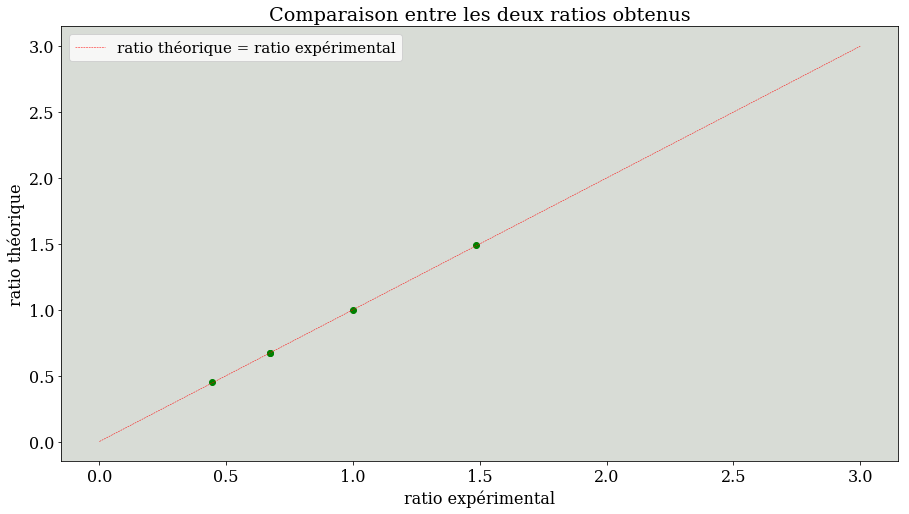

In [413]:
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(ratio_exp,ratio_th,'go',)
ax.plot([0,3],[0,3],'r--',label='ratio théorique = ratio expérimental',lw=0.5)
ax.set_facecolor('xkcd:light grey')
ax.set_xlabel('ratio expérimental')
ax.set_ylabel('ratio théorique')
ax.set_title('Comparaison entre les deux ratios obtenus')
ax.legend(fontsize=15)

plt.show()


### Challenge 2

Dans ce challenge nous allons "plot" l'énergie moyenne ainsi que la magnétisation comme une fonction de $\alpha$, que nous avons obtenu avec l'algorithme de Metropolis, avec les formules

$$<E>=\frac{\sum_k E_k}{N_k} $$
et
$$<M> = \frac{\sum_k M_k}{N_k} $$

Pour cela nous aurons besoin d'une fonction `energy_of_states_and_average` qui nous calcule l'énergie du système à chaque étape de l'algorithme de Metropolis et qui éventuellement nous renvoi aussi l'énergie moyenne pour un quadrillage donné

In [414]:
def energy_of_states_and_average(states,alpha): 
    
    #states = listes des états pour chaque étape de l'algorithme de Metropolis
    
    #alpha est la constante de couplage 
    
    energy_list=[]      #liste des énergies pour chaque étapes de l'algorithme
    
    average_energy=0
    
    for k in range(len(states)):        #On calcule l'énergie pour chaque état 
        
        energy=0
        
        for j in range(nx):
            
            for l in range(ny):
                
                energy+= energy_at_site(states[k],alpha,states[k][j,l],j,l)  
                
        energy_list.append(energy)    #On l'ajoute à la liste
        
    for m in range(len(states)):        #On calcule ensuite l'énergie moyenne 
        
        average_energy+=energy_list[m]
        
    average_energy=average_energy/len(states)
    
    return numpy.array(energy_list),average_energy

Maitenant nous sommes prêt à calculer l'énergie moyenne pour différentes valeurs de $\alpha$.

Notons que le temps de calcul des différentes énergie dépends fortement de la taille de $n_x$ et $n_y$, de ce fait nous nous limiterons à $n_x=n_y=10$ pour avoir un temps de calcul raisonnable.

Faisons maintenant le graphique

In [369]:
nx, ny = 10, 10

NMC = 100

sp = initial_state(nx,ny)

alpha = numpy.linspace(0,0.7,100)             #echelle de valeur pour alpha

average_energy_alpha = []

start_time = timeit.default_timer()           #On estime le temps de calcul de la cellule

for k in range(alpha.size):                    #On utilise l'algorithme de Metropolis pour chaque alpha différent
    
    sp = initial_state(nx,ny)

    average_energy_alpha.append(energy_of_states_and_average(ising_model_metropolis(sp, NMC, nx, ny, alpha[k]),alpha[k])[1])

elapsed = timeit.default_timer() - start_time     #On estime le temps de calcul de la cellule

print('Temps de calcul : ' + str(elapsed) + ' s')

Temps de calcul : 12.885303891991498 s


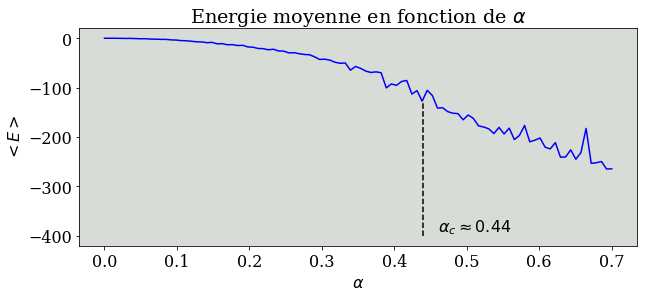

In [370]:
fig, ax = plt.subplots(figsize=(10,4))

ax.plot(alpha,numpy.array(average_energy_alpha),'b')
ax.plot([0.44,0.44],[-400,-130],'k--')
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$<E>$')
ax.set_title('Energie moyenne en fonction de ' + r'$\alpha$')
ax.set_facecolor('xkcd:light grey')
ax.annotate(r'$\alpha_c \approx 0.44$',xy=(0.46,-390), xytext=(0.46, -390))

plt.show()


In [337]:
#On refait exactement la même chose pour la magnétisation 


def magnetization_of_states_and_average(states):
    
    magnetization_list = []
    
    average_magnetization = 0
    
    for k in range(len(states)): 
        
        magnetization = 0
        
        for l in range(nx):
            
            for m in range(ny):
                
                magnetization += states[k][l,m]
                
        magnetization_list.append(magnetization)
    
    for n in range(len(states)):
        
        average_magnetization += magnetization_list[n]
        
    return average_magnetization/NMC

In [405]:
nx, ny = 10, 10

NMC = 100

sp = initial_state(nx,ny)

alpha = numpy.linspace(0.2,0.7,100)

average_magnetization_alpha = []

start_time = timeit.default_timer()

for k in range(alpha.size):
    
    sp = initial_state(nx,ny)
    
    average_magnetization_alpha.append(magnetization_of_states_and_average(ising_model_metropolis(sp, NMC, nx, ny, alpha[k])))
    
elapsed = timeit.default_timer() - start_time

print('Temps de calcul: ' + str(elapsed) + ' s') 



Temps de calcul: 8.888011315997574 s


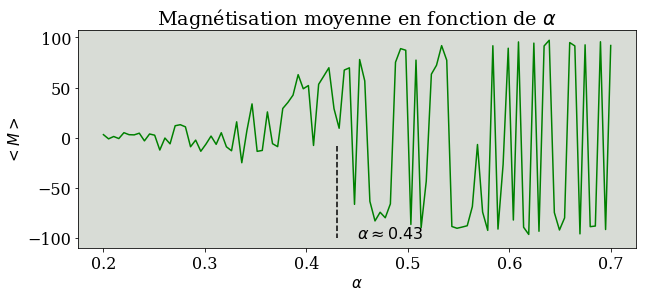

In [406]:

fig, ax = plt.subplots(figsize=(10,4))

ax.plot(alpha,numpy.array(average_magnetization_alpha),'g')

ax.plot([0.43,0.43],[-8,-100],'k--')

ax.set_xlabel(r'$\alpha$',fontsize = 15)
ax.set_ylabel(r'$<M>$',fontsize = 15)
ax.set_facecolor('xkcd:light grey')
ax.set_title('Magnétisation moyenne en fonction de ' + r'$\alpha$')
ax.annotate(r'$\alpha\approx 0.43$ ', xy=(0.45, -100), xytext=(0.45, -100))

plt.show()

#### $\alpha$ critique 

Il est très difficile de faire une bonne estimation de $\alpha_c$ dans un temps raisonnablement cours (< 1 min). Pour une valeur de $NMC = 100$ on ne voit pas distinctement où la transition se déroule, en revanche le temps de calcul est de moins de 10 secondes.

Pour être plus précis, nous avons calculé pour $NMC = 10.000$, car la théorie du Notebook 4 nous apprends que on attends la magnétisation moyenne réelle lorsque $NMC\rightarrow \infty$. Le temps de calcul était long ($\sim 200$ sec) mais nous avons clairement pu identifier la valeur $\alpha$ de transition : 

$$\alpha_c \simeq 0.43 $$

Les graphique de l'énergie moyenne et de la magnétisation moyenne indique que la valeur de $\alpha_{\text{critique}}$ se situe autour des $\alpha\approx0.4$. Evidemment cela reste très approximatif car il est dur d'évaluer sur le graphique où exactement $<M>$ devient non-null, et c'est rendu assez difficile par les légères fluctuations.
Grâce à [9], on sait que la valeur théorique de $\alpha$ se situe aux alentours des 

$$\alpha = \frac{J}{k_BT_c} = \frac{\ln\left(1+\sqrt{2}\right)}{2} \simeq 0.440687 $$

Nous sommes donc pas si éloigné que ça de la valeur théorique, étant donné le fait qu'il est dur d'estimer graphiquement où se situe $\alpha_c$

### Challenge 3

Nous allons refaire l'expérience avec différentes configurations du quadrillages, en commencant par celle où tous les spins du bord pointent vers le haut. Configurons ce quadrillage

In [457]:
#Données

NMC = 100

alpha = 0.7

nx, ny = 100, 100

In [454]:


sp_border_up = initial_state(nx,ny)

sp_random = initial_state(nx,ny)             #On va utiliser ce quadrillage ou les spins sont
                                             #random pour comparer avec celui aux conditions aux bords
for k in range(nx):
    sp_border_up[0,k] = -1                    #Tous les spins du bords pointent vers le haut
    sp_border_up[k,0] = -1
    sp_border_up[nx-1,k] = -1
    sp_border_up[k,ny-1] = -1

    
states_spin_border_up = ising_model_metropolis(sp_border_up, NMC, nx, ny, alpha)
states_random = ising_model_metropolis(sp_random, NMC, nx, ny, alpha)

Regardons comment le quadrillage évolue avec l'algorithme de Metropolis

In [448]:
#On reprend le code du Notebook 4

fig = plt.figure(figsize=(6,3))

plt.subplot(1, 2, 1)
img1 = plt.imshow(states_spin_border_up[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)
plt.subplot(1,2,2)
img2 = plt.imshow(states_random[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

# Animate
def animate(i):
    img1.set_array(states_spin_border_up[i])
    img2.set_array(states_random[i])
    

anim = animation.FuncAnimation(fig, animate, frames=NMC, interval=200)
plt.close()
HTML(anim.to_html5_video())

L'image de gauche représente le quadrillage avec les conditions aux bords. Pour $\alpha=0.2$, on ne remarque pas de différence notoire (nous ne l'avons pas affiché pour cela).

En revanche, dans le ca où $\alpha = 0.7$, nous voyons qu'au fur et à mesure que l'algorithme de Metropolis avance, les spins *up* gagnent du terrain sur les spins *down* car comme au bords tout les spins sont *up* alors les autres tendent aussi à s'aligner avec eux car ils sont distribués de manière uniforme (donc sans schéma particulier). Le cas inverse se produit lorsque nous mettons des spins *down* aux bords : les spins *up* perdent de plus en plus de terrain.

Regardons maintenant ce qu'il se passe pour une configuration où tous les spins pointent dans la même direction, disont *up*

In [458]:
sp_all_spin_up = numpy.ones([nx,ny])
states_all_spin_up = ising_model_metropolis(sp_all_spin_up, NMC, nx, ny, alpha)

In [459]:
#On reprend le code du Notebook 4

fig = plt.figure(figsize=(6,3))

#Quadrillage où les spins  sont tous up

plt.subplot(1, 2, 1)
img1 = plt.imshow(states_all_spin_up[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

#Quadrillage où les spins sont réparties aléatoirement

plt.subplot(1,2,2)
img2 = plt.imshow(states_random[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

# Animate
def animate(i):
    img1.set_array(states_all_spin_up[i])
    img2.set_array(states_random[i])
    

anim = animation.FuncAnimation(fig, animate, frames=NMC, interval=200)
plt.close()
HTML(anim.to_html5_video())

Dans le cas où tous les spins sont *up*, lorsque $\alpha=0.2$, alors les spins tendent à s'aligner de manière aléatoire (comme sur la figure de droite).

Lorsque $\alpha = 0.7$, alors le quadrillage tend à rester presque unifromément jaune (que des spins *up*), l'algorithme modifie très peu le quadrillage.

Nous pouvons aussi tester un quadrillage avec des spins répartis de manière aléatoire, et un "coeur" composé uniquement de spins *up* ou de spin *down* la photo ci-dessous.

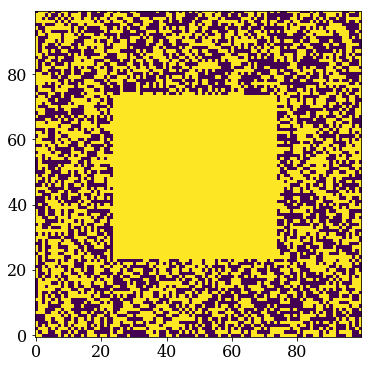

In [469]:
sp_core = initial_state(nx,ny)

#On construit un coeur de 25x25

core_length = 50

for k in range(core_length):          #Les spins du coeur poitent tous vers le haut
    for l in range(core_length):
        border = nx/2-1-(core_length-1)/2

        sp_core[int(border)+k,int(border)+l] = 1
        
        
plt.figure(figsize=(6,6))
plt.imshow(sp_core,interpolation='none',origin='lower')
plt.show()

Très bien ! Regardons comment tout cela évolue

In [470]:
states_core = ising_model_metropolis(sp_core, NMC, nx, ny, alpha)

In [471]:
#On reprend le code du Notebook 4

fig = plt.figure(figsize=(6,3))

#Quadrillage où le coeur est entièrement composé de spin up

plt.subplot(1, 2, 1)
img1 = plt.imshow(states_core[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

#Quadrillage où les spins sont réparties aléatoirement

plt.subplot(1,2,2)
img2 = plt.imshow(states_random[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

# Animate
def animate(i):
    img1.set_array(states_core[i])
    img2.set_array(states_random[i])
    

anim = animation.FuncAnimation(fig, animate, frames=NMC, interval=200)
plt.close()
HTML(anim.to_html5_video())

La encore pour $\alpha=0.7$ le carré tend à garder sa forme et les spins *up* gagnent du terrain sur le reste du quadrillage

## Sources 

[1] Page Wikipédia sur la Loi Student https://fr.wikipedia.org/wiki/Loi_de_Student 

[2] Page Wikipédia sur la Loi de Cauchy https://fr.wikipedia.org/wiki/Loi_de_Cauchy_(probabilit%C3%A9s)

[3] Page Wikipédia sur la Loi Binomiale https://fr.wikipedia.org/wiki/Loi_binomiale

[4] Listes des différents générateurs de nombres aléatoires https://docs.scipy.org/doc/numpy/reference/routines.random.html

[5] Page Wikipédia sur la méthode Box-Muller https://fr.wikipedia.org/wiki/Méthode_de_Box-Muller

[6] Matplotlib en 3D https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

[7] Uhlenbeck, G.E. and Ornstein, L.S. (1930) On the Theory of Brownian Motion. Physical Review, 36, 823-841. 

[8] Page Wikipédia sur l'équation de Fokker-Planck https://fr.wikipedia.org/wiki/%C3%89quation_de_Fokker-Planck

[9] Page Wikipédia sur Ising model https://en.wikipedia.org/wiki/Square-lattice_Ising_model

[10] Article sur les solutions de l'équation de Fokker-Planck http://wwwf.imperial.ac.uk/~pavl/lec_fokker_planck.pdf